In [22]:
from struct import unpack
import os
import shutil
path = 'MAFDataset/images/'
path2 = 'MAFDataset/images2/'
path3 = 'MAFDataset/images3/'
os.mkdir(path3)
marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}

files = os.listdir(path)
for file in files:
    try:
        with open(path+file, 'rb') as f:
            data = f.read()
           
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                break
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]            
            if len(data)==0:
                break
        #shutil.copyfile(path+file, path2+file)       
    except:
        f.close()
        #shutil.copyfile(path+file, path3+file) 
        os.remove(path+file)

In [34]:
import os
import numpy as np
import cv2
from array import *
import shutil
os.mkdir("MAFDataset/Mask/")
os.mkdir("MAFDataset/noMask/")


path = 'MAFDataset/images/'
files = os.listdir(path)
pathСW = 'MAFDataset/'

l=len(files)

i =0
for file in files:
    file_xml = int(file.split("_")[1])
    if file_xml<3:
        shutil.copyfile(path+file, pathСW+"Mask/"+file)
    else:
        shutil.copyfile(path+file, pathСW+"noMask/"+file)
    i+=1


KeyboardInterrupt: 

In [1]:
import tensorflow as tf
from tensorflow import keras

batch_size = 32
img_height = 64
img_width = 64
data_dir = 'MAFDataset/im/'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  label_mode = 'binary',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  label_mode = 'binary',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)




Found 11235 files belonging to 2 classes.
Using 8988 files for training.
Found 11235 files belonging to 2 classes.
Using 2247 files for validation.


In [2]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    image =tf.image.rgb_to_hsv(image, name=None)
    return image,label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [19]:
image_batch, labels_batch = next(iter(train_ds))
first_image = image_batch[0]
print(first_image)

tf.Tensor(
[[[0.19444445 0.03786985 0.62132305]
  [0.2857143  0.04318493 0.63566107]
  [0.26666668 0.06199748 0.63253677]
  ...
  [0.6197157  0.21774277 0.8775699 ]
  [0.61712384 0.23174286 0.80498815]
  [0.61773473 0.41215032 0.49068627]]

 [[0.14169948 0.0377424  0.61773896]
  [0.18585467 0.03635227 0.6295628 ]
  [0.22222222 0.05444749 0.64822304]
  ...
  [0.62056744 0.23099217 0.7979222 ]
  [0.6122449  0.37669513 0.51011246]
  [0.6057371  0.39877728 0.5115225 ]]

 [[0.14169948 0.04131595 0.5643088 ]
  [0.18585429 0.03845156 0.5951899 ]
  [0.21428572 0.08656587 0.6342218 ]
  ...
  [0.6380798  0.3651049  0.46672723]
  [0.6296297  0.38683683 0.45618874]
  [0.6123189  0.2612824  0.69041055]]

 ...

 [[0.62979233 0.26907194 0.61656207]
  [0.6228093  0.36329556 0.51308256]
  [0.6354167  0.21278974 0.58973795]
  ...
  [0.61904764 0.29872358 0.6432598 ]
  [0.6145834  0.2894852  0.6502415 ]
  [0.6296297  0.315066   0.5601067 ]]

 [[0.6372602  0.29211023 0.63726854]
  [0.6375951  0.47519484 0

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
import matplotlib.pyplot as plt



model = tf.keras.Sequential([
  #layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  #layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),  
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation = "sigmoid")
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [4]:
epoc=24
model.compile(optimizer='adam',loss = "binary_crossentropy", metrics = ["accuracy"])
history = model.fit( train_ds, validation_data=val_ds, epochs=epoc)


Epoch 1/24
281/281 [==============================] - 127s 428ms/step - loss: 0.3190 - accuracy: 0.8536 - val_loss: 0.1747 - val_accuracy: 0.9341
Epoch 2/24
281/281 [==============================] - 48s 168ms/step - loss: 0.1406 - accuracy: 0.9472 - val_loss: 0.1841 - val_accuracy: 0.9306
Epoch 3/24
281/281 [==============================] - 48s 169ms/step - loss: 0.1101 - accuracy: 0.9585 - val_loss: 0.1121 - val_accuracy: 0.9622
Epoch 4/24
281/281 [==============================] - 41s 145ms/step - loss: 0.0762 - accuracy: 0.9710 - val_loss: 0.1056 - val_accuracy: 0.9635
Epoch 5/24
281/281 [==============================] - 36s 126ms/step - loss: 0.0619 - accuracy: 0.9755 - val_loss: 0.0882 - val_accuracy: 0.9684
Epoch 6/24
281/281 [==============================] - 36s 126ms/step - loss: 0.0457 - accuracy: 0.9823 - val_loss: 0.0874 - val_accuracy: 0.9693
Epoch 7/24
281/281 [==============================] - 36s 127ms/step - loss: 0.0331 - accuracy: 0.9878 - val_loss: 0.0848 - val_a

In [8]:
epochs=3
history = model.fit( train_ds, validation_data=val_ds, epochs=3)

Epoch 1/3
281/281 [==============================] - 30s 104ms/step - loss: 0.0357 - accuracy: 0.9869 - val_loss: 0.0754 - val_accuracy: 0.9773
Epoch 2/3
281/281 [==============================] - 29s 102ms/step - loss: 0.0247 - accuracy: 0.9912 - val_loss: 0.0790 - val_accuracy: 0.9795
Epoch 3/3
281/281 [==============================] - 29s 103ms/step - loss: 0.0188 - accuracy: 0.9932 - val_loss: 0.0962 - val_accuracy: 0.9769


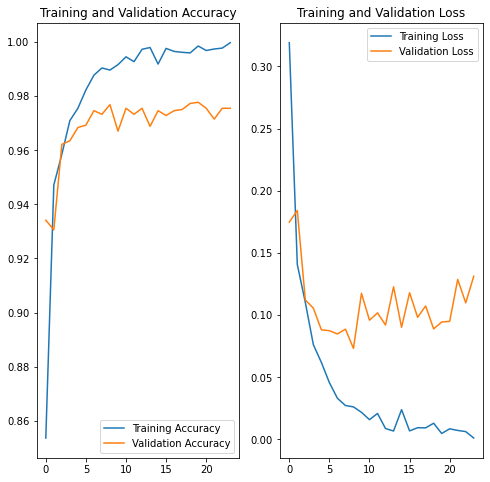

In [5]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoc)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [26]:
data_path = 'MAFDataset/t4.jpg'
img = tf.keras.utils.load_img(
    data_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

img_array/=255
img_array = tf.image.rgb_to_hsv(img_array, name=None)


#img_array

In [27]:
predictions = model.predict(img_array)
score = predictions[0]
if(score>0.3):
    print("nomask")
else:
    print("mask")

print(score)

mask
[4.788862e-13]


In [8]:
model.save("my_modelHVS.h5", include_optimizer=False)

In [9]:
#import tensorflow as tf
from tensorflow.keras import models,utils
from tensorflow import expand_dims

batch_size = 32
img_height = 64
img_width = 64

new_model = models.load_model('my_modelHVS.h5')

# Check its architecture
new_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [17]:
data_path = 'MAFDataset/t4.jpg'
img = utils.load_img(
    data_path, target_size=(img_height, img_width)
)
img_array = utils.img_to_array(img)
img_array = expand_dims(img_array, 0) # Create a batch

img_array/=255
img_array = tf.image.rgb_to_hsv(img_array, name=None)

predictions = new_model.predict(img_array)
score = predictions[0]
if(score>0.3):
    print("nomask")
else:
    print("mask")

print(score)


mask
[4.788862e-13]


In [18]:
from struct import unpack
import os
import shutil
path = 'Test/'
path2 = 'TestoutHSV/'

os.mkdir(path2)


files = os.listdir(path)
for file in files:
   # try:
        img = utils.load_img(
        path+file, target_size=(img_height, img_width)
        )
        img_array = utils.img_to_array(img)
        img_array = expand_dims(img_array, 0) # Create a batch
        img_array/=255
        img_array = tf.image.rgb_to_hsv(img_array, name=None)

        predictions = new_model.predict(img_array)
        score = predictions[0]
        
        file_xml = int(file.split("_")[1])
        #if (file_xml<3) and (score>0.3):
        #    shutil.copyfile(path+file, path2+file)
            
        if (file_xml<3) == (score>0.3):
            shutil.copyfile(path+file, path2+file)
          
        
   # except:
        #f.close()
        #shutil.copyfile(path+file, path3+file) 
        #os.remove(path+file)